In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import mariadb
import sys

import os
from dotenv import load_dotenv


### Conexão com o banco de dados

In [2]:
class DBConnection:
    @staticmethod
    def getConnection():
        load_dotenv(override=True)
        try:
            conn = mariadb.connect(
                user=os.environ['DATABASE_USERNAME'],
                password=os.environ['DATABASE_PASSWORD'],
                host=os.environ['HOST_CONNECT'],
                port=int(os.environ['DATABASE_PORT']),
                database=os.environ['DATABASE_NAME']

            )
        except mariadb.Error as e:
            print(f"Error connecting to MariaDB Platform: {e}")
            sys.exit(1)
            
        return conn.cursor(dictionary=True)

conn = DBConnection.getConnection()


In [ ]:
conn.execute("""
            SELECT 
                wp_posts.ID,
                wp_posts.post_title,
                Round(Avg(DISTINCT(wp_commentmeta.meta_value)), 1) AS nps,
                COUNT(DISTINCT(wp_wc_order_product_lookup.product_id)) as qt_orders,
                COUNT(DISTINCT(wp_commentmeta.meta_id)) as rating_count,
                Round(wp_wc_product_meta_lookup.max_price, 2) as current_price,
                wp_wc_product_meta_lookup.stock_quantity,
                CASE 
                    WHEN wp_wc_product_meta_lookup.stock_status = "instock" THEN 1
                    ELSE 0
                END as stock_status
            FROM   wp_posts
                LEFT JOIN wp_comments
                        ON wp_posts.id = wp_comments.comment_post_id
                LEFT JOIN wp_commentmeta
                        ON wp_comments.comment_id = wp_commentmeta.comment_id
                LEFT JOIN wp_wc_order_product_lookup
                        ON wp_posts.ID = wp_wc_order_product_lookup.product_id
                LEFT JOIN wp_wc_product_meta_lookup
                        ON wp_posts.ID = wp_wc_product_meta_lookup.product_id
            WHERE 
            (wp_commentmeta.meta_key = 'rating' OR wp_commentmeta.meta_key is null)
            AND wp_posts.post_type = "product"
            GROUP BY wp_posts.post_title  
        """)

products_kpis_1 = pd.DataFrame(self.conn.fetchall())

products_kpis_list = []

for index, row in products_kpis_1.iterrows():
    index_recompra = self.get_index_recompra(row['ID'])
    new_row = dict({
        "id": row['ID'],
        "post_title": row['post_title'],
        "current_price": row['current_price'],
        "nps": row['nps'],
        "stock_quantity": row['stock_quantity'],
        "stock_status": row['stock_status'],
        "qt_orders": row['qt_orders'],
        "rating_count": row['rating_count'],
        "repurchase": index_recompra,
    })
    products_kpis_list.append(new_row)

products_kpi = pd.DataFrame(products_kpis_list)

products_kpi['nps'] = products_kpi['nps'].fillna(0)
products_kpi['stock_quantity'] = products_kpi['stock_quantity'].fillna(99999)

X = np.array(products_kpi.drop(['post_title', 'id', 'current_price'], axis=1))

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

classes = list(map(self.padronizar_classe, kmeans.labels_))
products_kpi['K_classes'] = classes

scaler = StandardScaler()

scaled_data = scaler.fit_transform(pedidos)

scaled_orders = pd.DataFrame(scaled_data)


products_kpi = products_kpi.sort_values(by='K_classes')

In [3]:
def get_index_recompra(product_id):
    conn.execute("""
            SELECT COUNT(*) qt, customer_id, product_id FROM `wp_wc_order_product_lookup`
            WHERE product_id  = %s
            GROUP BY customer_id, product_id
        """, [product_id])

    pedidos = pd.DataFrame(conn.fetchall())

    try:
        sum_compras = np.sum(list(pedidos['qt']))

        filter = pedidos['qt'] > 1

        recompras = pedidos.where(filter)
        sum_recompras = np.sum(list(recompras['qt'].fillna(0)))

        if (sum_compras == 0):
            return 0

        num_recompra = round(sum_recompras / sum_compras * 100, 2)
        return num_recompra
    except KeyError:
        return 0


In [6]:
sns.pairplot(products_kpi)

In [26]:
X = np.array(products_kpi.drop(['post_title', 'id'], axis=1))

In [8]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [28]:
kmeans.fit_transform(X)

array([[39567.978776  , 19229.88150087, 11962.2239524 ],
       [56787.99402369,  2011.09542544, 29182.10604092],
       [31640.48286196, 27157.16720102,  4034.58650356],
       [ 1699.15927628, 60496.68095971, 29304.99147414],
       [16671.73204368, 42126.16223002, 10934.69767559],
       [64748.50967039,  5950.9262197 , 37142.57124524],
       [43010.89175841, 15786.99270948, 15405.08330048],
       [64674.30970301,  5876.73009285, 37068.37163474],
       [52653.10070836,  6144.5878391 , 25047.16432269],
       [32892.93226246, 25904.71659923,  5287.0203695 ],
       [ 4221.40824498, 54577.0469792 , 23385.4412991 ],
       [ 2599.14314955, 61396.70062373, 30205.01080416],
       [  258.78987229, 59055.65111264, 27863.96182339],
       [57101.04331676,  1698.29544809, 29495.15435599],
       [ 7801.4417557 , 50996.22174321, 19804.5343921 ],
       [62228.66019472,  3431.11954283, 34622.72214139],
       [17416.49322718, 41381.39330805, 10189.9485807 ],
       [21589.02576402, 37208.6

In [40]:
kmeans.labels_
w = kmeans.transform(X)

w = list(map(lambda x: x.sum(), w))
w

[70760.08422926757,
 87981.19549004722,
 62832.2365665358,
 91500.83171014003,
 69732.59194929317,
 107842.00713532453,
 74202.96776836843,
 107619.41143059624,
 83844.85287015181,
 64084.66923119099,
 82183.89652328505,
 94200.85457743157,
 87178.40280832237,
 88294.49312084167,
 78602.19789101087,
 100282.50187894312,
 68987.83511593424,
 64814.60769214576,
 109090.75971374215,
 70259.46500424648,
 71939.27686907831,
 77865.8243554336,
 80805.80608445175,
 79721.20331513736,
 63557.42686443461,
 79977.30280132729,
 110178.02305851315,
 89388.82170379095,
 115885.45815712117,
 59561.64285200602,
 83857.1937220203,
 139648.88723153953,
 78960.06718169348,
 63652.130729709264,
 81042.88032023692,
 109312.94027527038,
 125009.5748220142,
 105466.16831296247,
 94265.26087299576,
 63480.2898553311,
 63867.503799248865,
 77830.53149806397,
 79506.01102243508,
 78854.15084379104,
 72686.33330864755,
 63295.28202571407,
 68631.97654796769,
 67679.25982897381,
 128376.61957670702,
 139151.2389

In [41]:
products_kpi['K_classes'] = kmeans.labels_
products_kpi['distance'] = w
products_kpi

,id,post_title,current_price,nps,qt_orders,rating_count,repurchase,K_classes,distance
0,96,1500,48579.35,3.5,0,3,0.00,2,70760.084229
1,92,350Z,31359.31,3.0,0,2,0.00,1,87981.195490
2,32,370Z,56506.77,3.0,1,10,100.00,2,62832.236567
3,42,5000S,89846.29,3.0,1,16,99.39,0,91500.831710
4,101,911,71475.71,3.5,0,2,0.00,2,69732.591949
...,...,...,...,...,...,...,...,...,...
65,90,W201,33433.27,4.0,0,1,0.00,1,85906.537327
66,30,XC70,69076.18,3.5,2,10,100.00,2,67332.548407
67,103,XJ,36574.82,2.0,0,1,0.00,1,82764.706269
68,55,XK,29164.95,3.5,1,15,98.72,1,90545.005906


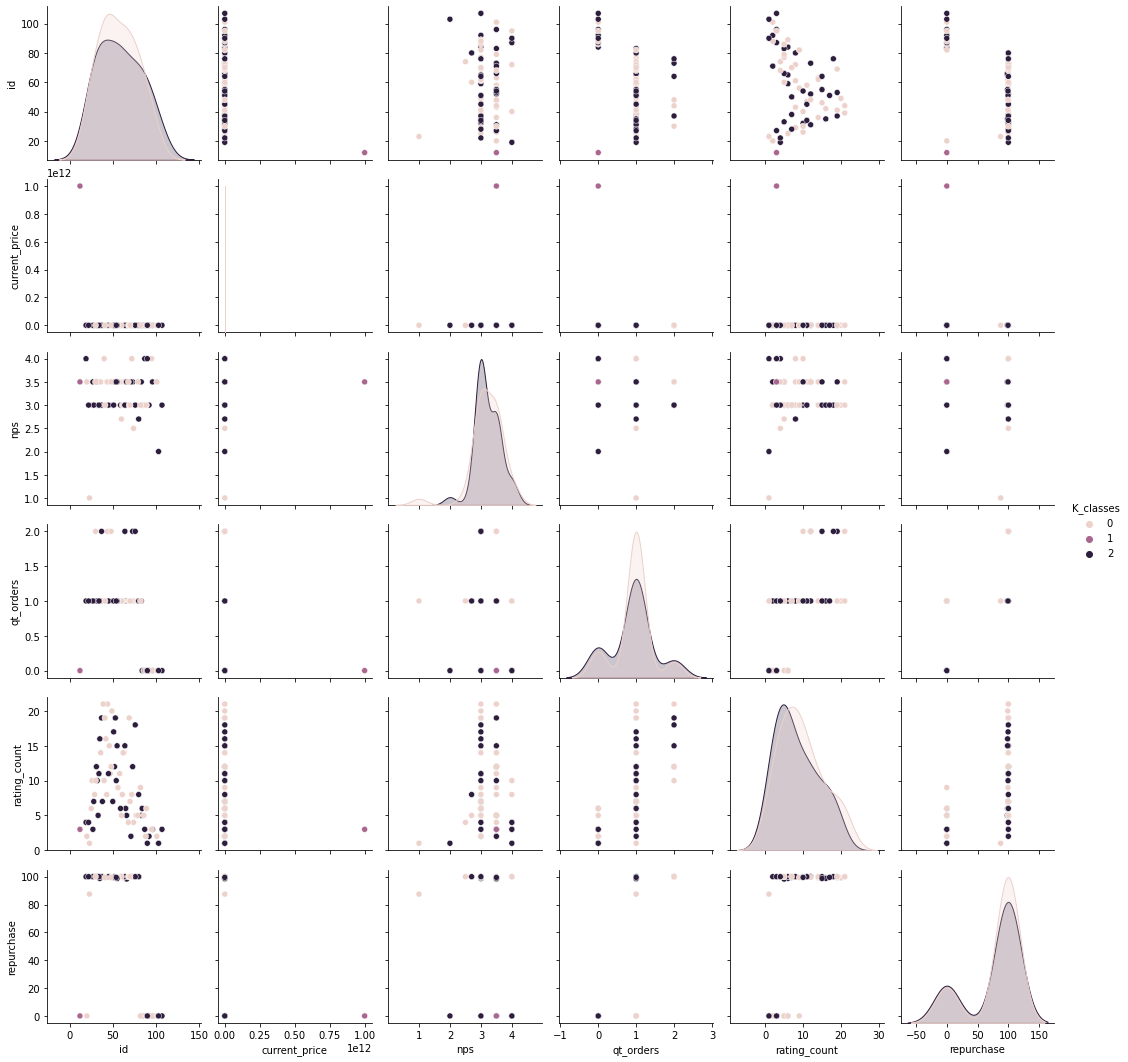

In [12]:
sns.pairplot(products_kpi, hue='K_classes')

In [22]:
products_kpi.to_dict('records')
products_kpi.sort_values('K_classes')

AttributeError: 'DataFrame' object has no attribute 'orderBy'

In [ ]:
import pgeocode

conn.execute("""
        SELECT postcode FROM `wp_wc_customer_lookup`  
        WHERE postcode is not null and postcode != "";
    """)

list_post_code = pd.DataFrame(self.conn.fetchall())
list_post_code = list(list_post_code['postcode'])

nomi = pgeocode.Nominatim('fr')
# list_lat_long = nomi.query_postal_code(list_post_code)
teste = nomi.query_postal_code("75013")
teste

NameError: name 'conn' is not defined

### NPS dos produtos

In [4]:
conn.execute("""
    SELECT wp_posts.post_title, AVG(wp_commentmeta.meta_value) as nps FROM wp_posts
    INNER JOIN wp_comments ON wp_posts.ID = wp_comments.comment_post_ID
    INNER JOIN wp_commentmeta ON wp_comments.comment_ID = wp_commentmeta.comment_id
    WHERE
    wp_commentmeta.meta_key = 'rating'
    GROUP BY wp_posts.post_title
    ORDER BY nps DESC
""")

nps = pd.DataFrame(conn.fetchall())
nps

,post_title,nps
0,E-Class,4.10
1,Dakota Club,4.00
2,W201,4.00
3,Horizon,4.00
4,Diamante,4.00
...,...,...
66,S80,2.80
67,H1,2.75
68,SLK-Class,2.50
69,XJ,2.00


### Médias

In [5]:
conn.execute("""
    SELECT AVG(total_sales) FROM wp_wc_order_stats
""")

ticket_medio = pd.DataFrame(conn.fetchall())

conn.execute("""
    SELECT AVG(num_items_sold) FROM wp_wc_order_stats
""")

media_itens_carrinho = pd.DataFrame(conn.fetchall())
media_itens_carrinho, ticket_medio

(  AVG(num_items_sold)
 0              2.2466,
    AVG(total_sales)
 0     273758.872067)

### Churn

#### Churn mensal

O Churn mensal da unidade pode ser calculado da seguinte forma:

C = CP / TCMA

1. CP é a quantidade de clientes perdidos
2. TCMA é o total de clientes no mês anterior
3. C é o Churn

Vamos considerar como um cliente perdido aquele que não teve nenhuma interação com organização em 24 meses

In [6]:
from datetime import datetime, date, timedelta

# primeiro_dia_mes = datetime.today().strftime('%Y-%m') + "-01"
primeiro_dia_mes = "2022-08-01"

ano_atual = datetime.today().strftime('%Y')
dois_anos_atras = str(int(ano_atual) - 2) + "-" + datetime.today().strftime('%m-%d')

qt_novos_clientes_mes_anterior = conn.execute("""
    SELECT
        count(*) as qt
    FROM wp_users
    INNER JOIN wp_wc_customer_lookup ON wp_users.ID = wp_wc_customer_lookup.user_id
    WHERE user_registered >= %s
""", [primeiro_dia_mes])

qt_novos_clientes_mes_anterior = pd.DataFrame(conn.fetchall())

qt_clientes_perdios = conn.execute("""
    SELECT
        count(*) as qt
    FROM wp_wc_customer_lookup
    WHERE wp_wc_customer_lookup.date_last_active < %s
""", [dois_anos_atras])

qt_clientes_perdios = pd.DataFrame(conn.fetchall())

churn_mensal = qt_clientes_perdios['qt'][0] / qt_novos_clientes_mes_anterior['qt'][0] * 100
churn_mensal

7.142857142857142

### Churn bruto pode ser calculado da seguinte forma:
CB = MRR′ / MRR′′

Onde MRR’ é a receita recorrente mensal de um determinado mês, MRR” é a receita
recorrente mensal do início do mês e CB é Churn Bruto.


In [7]:
def get_mrr():
    primeiro_dia_mes = datetime.today().strftime('%Y-%m') + "-01"
    hoje = datetime.today()

    conn.execute("""
        SELECT AVG(total_sales) mean FROM wp_wc_order_stats WHERE date_created BETWEEN %s AND %s
    """, [primeiro_dia_mes, hoje.strftime('%Y-%m-%d')])

    mrr_i = pd.DataFrame(conn.fetchall())

    dias_subtracao = int(datetime.today().strftime('%d')) + 1
    td = timedelta(dias_subtracao * -1)

    ultimo_dia_mes_passado = hoje + td
    ultimo_dia_mes_passado = ultimo_dia_mes_passado.strftime('%Y-%m-%d')

    dias_mes_passado = int((hoje + td).strftime('%d')) * -1
    td_2 = timedelta(dias_mes_passado)

    primeiro_dia_mes_passado = hoje + td + td_2
    primeiro_dia_mes_passado = primeiro_dia_mes_passado.strftime('%Y-%m-%d')

    conn.execute("""
        SELECT AVG(total_sales) mean FROM wp_wc_order_stats WHERE date_created BETWEEN %s AND %s
    """, [primeiro_dia_mes_passado, ultimo_dia_mes_passado])

    mrr_ii = pd.DataFrame(conn.fetchall())

    mrr_i = mrr_i['mean'][0]
    mrr_ii = mrr_ii['mean'][0]

    return [mrr_i, mrr_ii]

def get_churn_bruto(mrr_i, mrr_ii):
    if mrr_i == None:
        return 1 * 100

    if mrr_ii == None:
        return 0 * 100

    return mrr_i / mrr_ii * 100

mrr_i, mrr_ii = get_mrr()

churn_bruto = get_churn_bruto(mrr_i, mrr_ii)
churn_bruto

100

### Churn Líquido
O Churn Líquido se da pela equação:
CL = MRR′ −UPSELLS′ / MRR′′
o MRR’ é a perda de receita recorrente mensal no mês X, o UPSELLS’, em e-commerces
é o aumento do ticket médio, em serviços de assinatura é o valor da assinatura e CL é Churn líquido

In [8]:
def get_delta_tickt_medio():
    mrr_i, mrr_ii = get_mrr()
    if mrr_i == None:
        mrr_i = 0

    if mrr_ii == None:
        mrr_ii = 0

    upsells = mrr_i - mrr_ii
    return upsells

def get_churn_liquido():
    upsell = get_delta_tickt_medio()
    mrr_i, mrr_ii = get_mrr()

    if mrr_i == None:
        mrr_i = 0

    if mrr_ii == None:
        mrr_ii = 0

    return mrr_i - upsell / mrr_ii

churn_liquido = get_churn_liquido()
churn_liquido

1.0

### CLV

CLV = ∑ (pt − ct )rt / (1 + i)r − CAC

Onde

pt = valor da compra no tempo t,

ct = quaisquer custos relacionado a compra no tempo t,

i = taxa de desconto ou custo de capital para a empresa,

T∗= expectativa do tempo de relacionamento com o cliente (Para Kepler, 24 meses),

CAC = custo de aquisição de cliente

In [25]:

hoje = datetime.today().strftime('%Y-%m-%d')
dois_anos_atras = str(int(ano_atual) - 2) + "-" + datetime.today().strftime('%m-%d')

taxa_conversao = 0.05

receita_liquida_sql = conn.execute("""
    SELECT SUM(net_total) as nt FROM `wp_wc_order_stats` WHERE date_created BETWEEN %s AND %s
""", [dois_anos_atras, hoje])

receita_liquida = pd.DataFrame(conn.fetchall())
receita_liquida = receita_liquida['nt']

clv = receita_liquida * taxa_conversao / (1 + 0.11)
clv


0    1.724888e+07
Name: nt, dtype: float64

In [24]:
media_tv_cliente = 1 / churn_mensal
kepler_ltv = receita_liquida * media_tv_cliente
kepler_ltv

0    5.360953e+07
Name: nt, dtype: float64

### Obtendo dados dos pedidos


In [10]:
relacao_pedidos = conn.execute("""
    SELECT 
        wp_wc_order_product_lookup.product_id,
        wp_wc_order_product_lookup.product_qty, 
        # wp_wc_order_product_lookup.date_created, 
        (wp_wc_order_product_lookup.product_net_revenue / wp_wc_order_product_lookup.product_qty) as unit_net_revenue,
        (wp_wc_order_product_lookup.product_gross_revenue / wp_wc_order_product_lookup.product_qty) as unit_gross_revenue,
        wp_wc_product_meta_lookup.max_price as current_price,
        wp_wc_product_meta_lookup.average_rating as nps,
        wp_wc_product_meta_lookup.rating_count
    FROM wp_wc_order_product_lookup
    INNER JOIN wp_posts ON wp_wc_order_product_lookup.product_id = wp_posts.ID
    INNER JOIN wp_wc_product_meta_lookup ON  wp_posts.ID = wp_wc_product_meta_lookup.product_id
""")

pedidos = pd.DataFrame(conn.fetchall())
pedidos

,product_id,product_qty,unit_net_revenue,unit_gross_revenue,current_price,nps,rating_count
0,19,1,25918.59,51837.180000,25918.5900,4.00,3
1,19,1,25918.59,79738.350000,25918.5900,4.00,3
2,20,1,83926.61,147965.440000,83926.6100,3.00,1
3,21,1,26334.22,79800.215000,26334.2200,3.29,7
4,21,1,26334.22,54083.805000,26334.2200,3.29,7
...,...,...,...,...,...,...,...
6002,80,1,23177.94,82017.630000,23177.9400,3.43,7
6003,81,1,80228.10,129346.126667,80228.1000,0.00,0
6004,82,1,60923.26,121846.520000,60923.2600,3.00,8
6005,83,1,31046.26,87866.098000,31046.2600,3.50,4


### Padronizando variáveis

In [31]:
from sklearn.preprocessing import StandardScaler
import random

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pedidos)
scaled_orders = pd.DataFrame(scaled_data)
scaled_orders.columns = pedidos.columns
scaled_orders['target'] = [random.randrange(0, 2, 1) for i in range(6007)]
scaled_orders

,product_id,product_qty,unit_net_revenue,unit_gross_revenue,current_price,nps,rating_count,target
0,-3.016008,-0.174792,-1.489400,-1.899575,-1.489400,2.099615,-1.647489,1
1,-3.016008,-0.174792,-1.489400,-1.149411,-1.489400,2.099615,-1.647489,1
2,-2.917088,-0.174792,0.909088,0.684976,0.909088,-1.096113,-2.084197,1
3,-2.818168,-0.174792,-1.472215,-1.147748,-1.472215,-0.169352,-0.774072,1
4,-2.818168,-0.174792,-1.472215,-1.839172,-1.472215,-0.169352,-0.774072,1
...,...,...,...,...,...,...,...,...
6002,3.018099,-0.174792,-1.602719,-1.088129,-1.602719,0.278050,-0.774072,0
6003,3.117019,-0.174792,0.756163,0.184368,0.756163,-10.683296,-2.302552,1
6004,3.215939,-0.174792,-0.042044,-0.017270,-0.042044,-1.096113,-0.555718,1
6005,3.314858,-0.174792,-1.277384,-0.930884,-1.277384,0.501751,-1.429135,1


### Corelação das variáveis 

<AxesSubplot:>

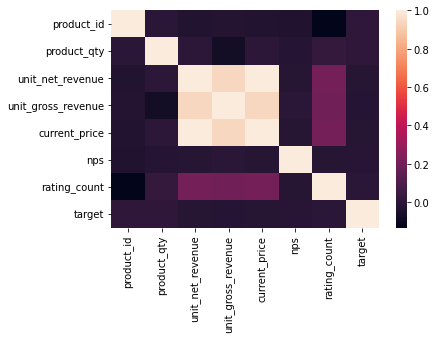

In [32]:
sns.heatmap(scaled_orders.corr())

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = scaled_orders.drop('target', axis=1).values
Y = scaled_orders['target'].values

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=0)

X_treino, X_teste, Y_treino, Y_teste

(array([[ 1.73214188, -0.17479182,  0.94699461, ...,  0.94699461,
          1.46046942, -1.21078068],
        [ 0.14942536, -0.17479182, -0.73553326, ..., -0.73553326,
         -0.29718087,  1.19111536],
        [ 1.83106167, -0.17479182,  0.30939472, ...,  0.30939472,
          1.04502481, -1.64748905],
        ...,
        [-0.64193291, -0.17479182,  1.19195305, ...,  1.19195305,
          0.27805013, -0.77407231],
        [-0.14733399, -0.17479182,  0.21442318, ...,  0.21442318,
         -1.09611283, -1.21078068],
        [-0.14733399, -0.17479182,  0.21442318, ...,  0.21442318,
         -1.09611283, -1.21078068]]),
 array([[ 0.05050557, -0.17479182, -1.59358987, ..., -1.59358987,
         -1.63938656, -0.9924265 ],
        [ 0.4461847 , -0.17479182, -0.54041223, ..., -0.54041223,
          0.69349475, -0.33736394],
        [ 0.4461847 , -0.17479182, -0.54041223, ..., -0.54041223,
          0.69349475, -0.33736394],
        ...,
        [ 0.54510449, -0.17479182, -1.35517137, ..., -

In [36]:
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [37]:
score_treino = modelo.score(X_treino, Y_treino)
score_treino

0.5125416204217536

In [38]:
Y_previsto = modelo.predict(X_teste)
Y_previsto

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
score_teste = modelo.score(X_teste, Y_teste)
score_teste

0.4840213049267643

<AxesSubplot:>

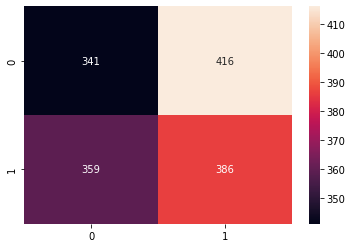

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm,annot=True, fmt="d")

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, _ = roc_curve(Y_teste, Y_previsto)
roc_auc = auc(fpr, tpr) * 100
roc_auc

48.429157837809086

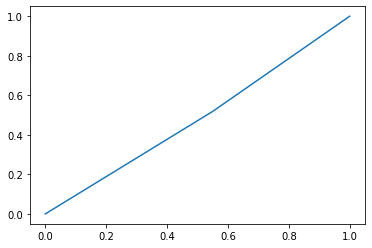

In [44]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)